# Lecture 4 - Decision Trees and Random Forests
### [Areeb Gani](https://github.com/Qwerty71), [Michael Ilie](https://www.mci.sh), [Vijay Shanmugam](https://www.vijayrs.ml)

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from IPython.display import display

## Data

We will use our iris dataset as the toy dataset for this example. Below, we can load the preprocessed dataset from `sklearn.datasets` into variables `X` and `y`. As a reminder, the target variables (`y`) for this dataset represent the species of flower, and whether it is setosa (0), versicolor (1), or virginica (2).

In [ ]:
iris = datasets.load_iris(as_frame=True)
X = iris.data
y = iris.target

display(X)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

## Training Model and Visualizing Tree

The idea of a decision tree is that we want the algorithm to make decisions to classify each entry in the dataset. The real question is how to figure which decisions are the most optimal ones to make - to do this, we need to understand three concepts: **entropy**, **information gain**, and **gini impurity**. In summary, entropy refers to the randomness within data, information gain refers to the reduction in entropy within data after a split is made, and the gini impurity tells us how impure or convoluted our data is after our decision split.

Using sklearn's API, we can create a Decision Tree classifier using `sklearn.tree.DecisionTreeClassifier`. Within the instantiator, we define a `random_state` so that the randomness involved in creating the model remains constant whenever we run the code (feel free to change the state, but be aware that it may change the results). We then call the `.fit(X, y)` method of the classifier to train the model on the data.

Finally, we plot the actual tree's decisions. We first define the size of our output figure, and then we use `sklearn.tree.plot_tree` to generate the graph.

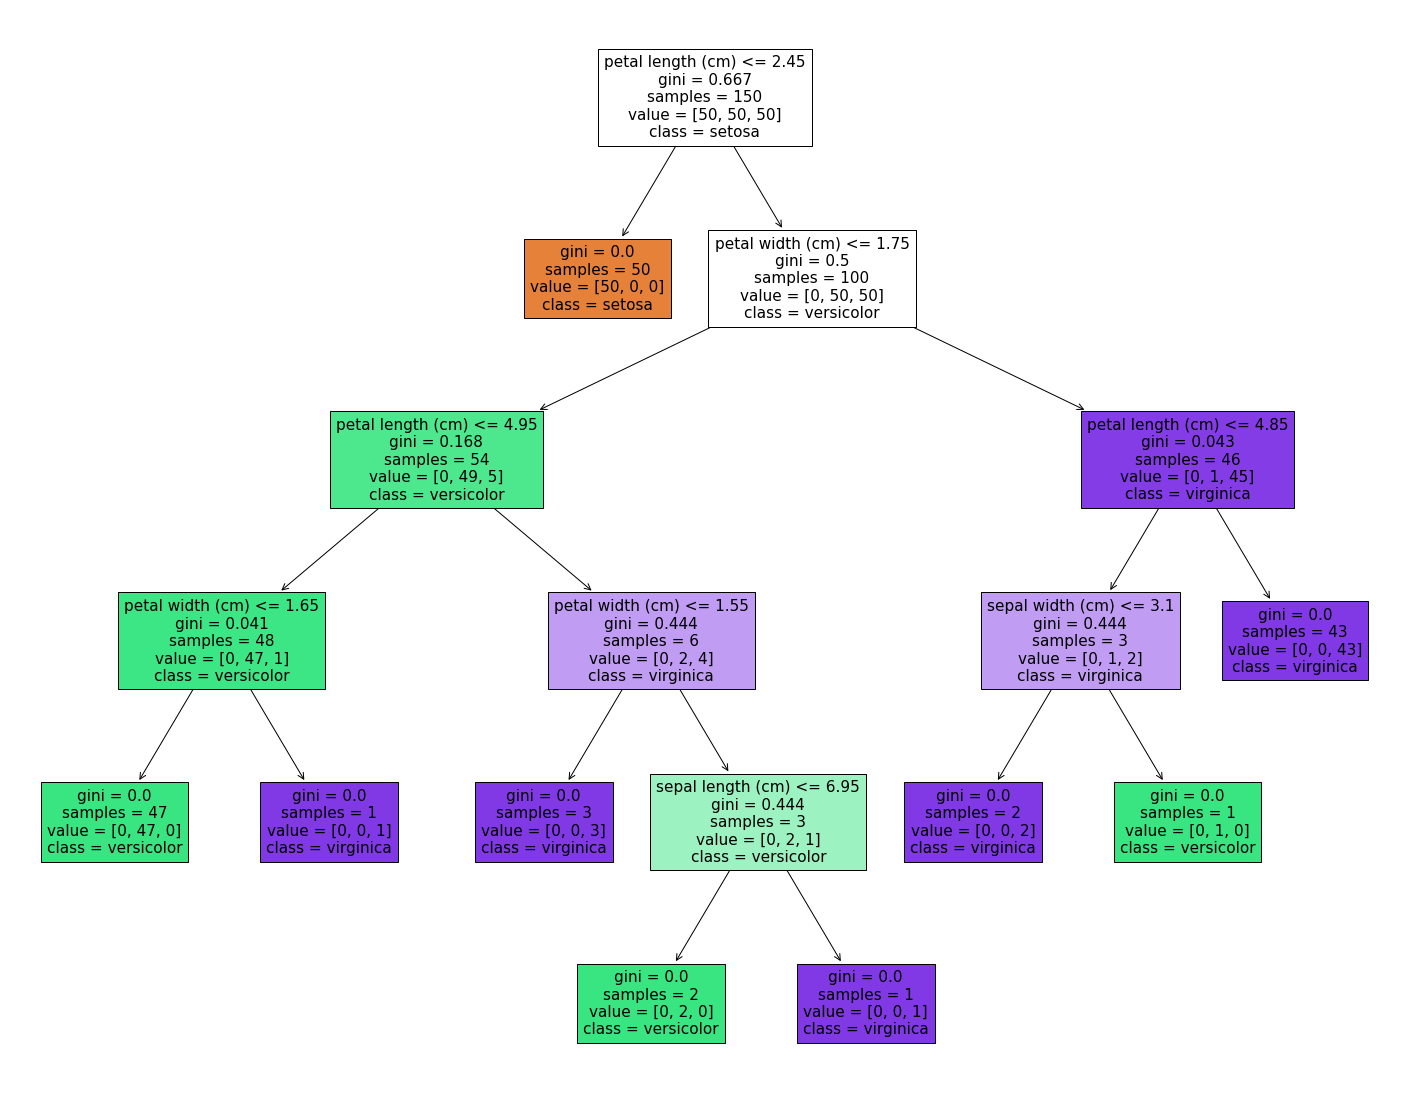

In [ ]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

Notice that the **gini impurity scores** are 0 in all of the leaf nodes for this specific tree. This suggests that these decisions have no impurity, meaning they are 100% decisive. We can interpret this as the model having 100% accuracy - to confirm our hypothesis, we check the accuracy score of our model below:

In [ ]:
print(clf.score(X, y))

1.0


## Visualizing All Classification Methods (So Far)

The plot generated below shows a generated 2D dataset and how the different classification methods we have discussed so far handle the data. The decision tree generates a very distinct and clear decision boundary, whereas the separations for the random forest are more convoluted (as can be expected, since there are multiple trees). We can also graph the logistic regression model, which shows linear gradients for probability outputs. Our first model doesn't perfectly fit the data (note the score in the bottom right), but a slight tweak to some hyperparameters can fix that for us in the next model (to be exact, the slight tweak is a removal of **regularization**, which we will cover shortly - this just goes to show how the performance of a model can change based on decisions the user makes).

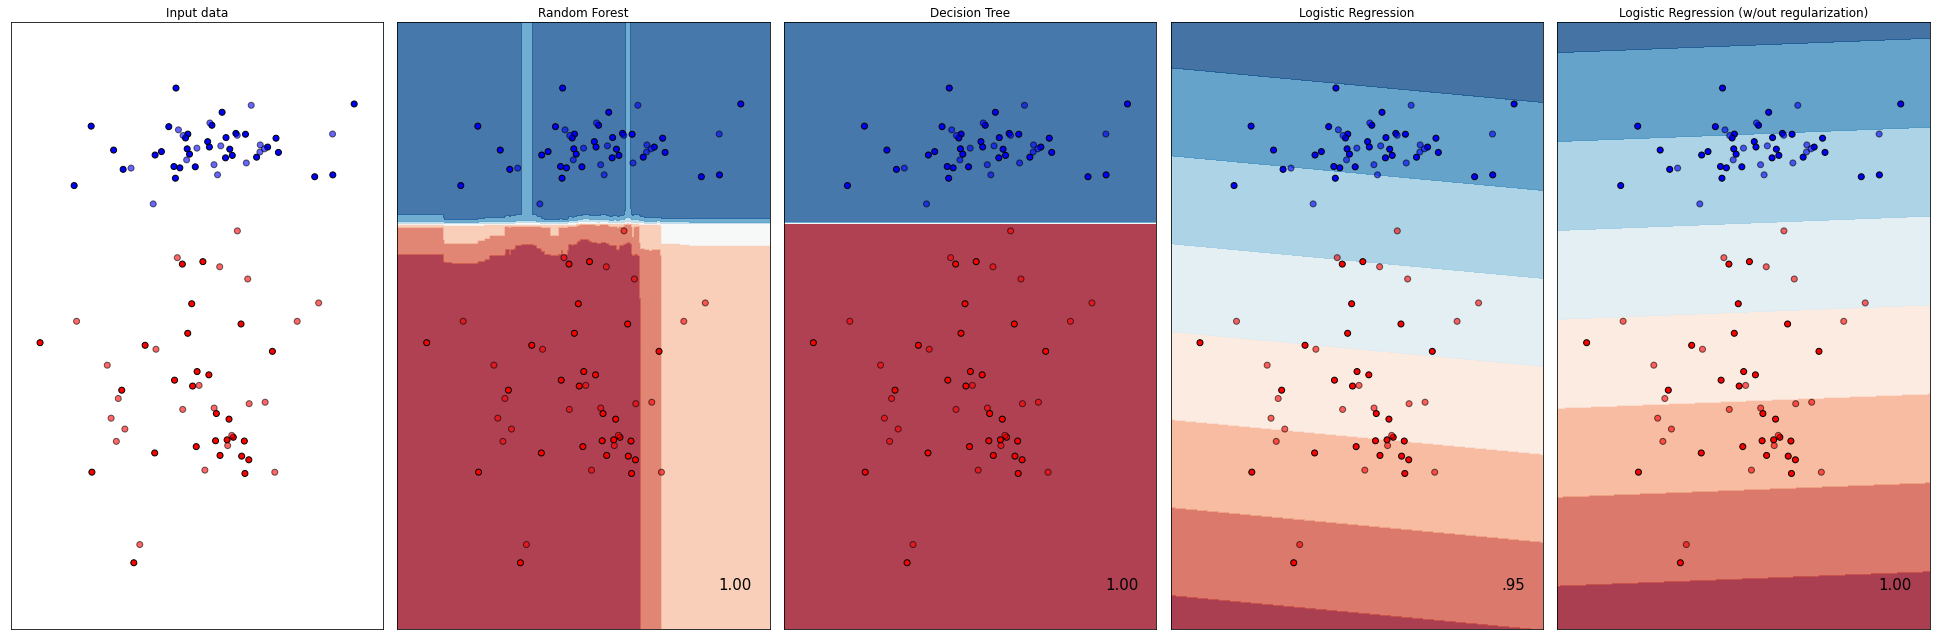

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

h = 0.02  # step size in the mesh

names = [
    "Random Forest",
    "Decision Tree",
    "Logistic Regression",
    "Logistic Regression (w/out regularization)"
]

classifiers = [
    RandomForestClassifier(max_depth=5),
    DecisionTreeClassifier(max_depth=5),
    LogisticRegression(),
    LogisticRegression(penalty='none')
]

#X = iris.data
#y = iris.target

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=1, random_state=1, n_clusters_per_class=1
)

test_data = X

datasets = [
    (test_data, y)
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

h = 0.02  # step size in the mesh

names = [
    "Random Forest",
    "Decision Tree"
]

classifiers = [
    RandomForestClassifier(),
    DecisionTreeClassifier()
]

#X = iris.data
#y = iris.target

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, n_classes=3
)

test_data = X

datasets = [
    (test_data, y)
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdYlBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF", "#FFFB00"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=cm)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

## Exercises

Try running a) Logistic Regression, b) Decision Trees, and c) Random Forests using the [wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) and [breast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) datasets provided by sklearn. For the decision trees, make sure to visualize the actual tree and get an understanding of what decisions the algorithm is making.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=16604665-bd81-4299-9d68-36e5b874d0ef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>